### image data를 json으로 만들어주는 코드

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image as Im
import glob
import json

In [2]:
print(os.listdir('data/Expw-F'))

FileNotFoundError: [Errno 2] No such file or directory: 'data/Expw-F'

In [5]:
emo=['sad', 'happy', 'angry', 'disgust', 'surprise', 'fear', 'neutral']
sad_imgs,happy_imgs,angry_imgs,disgust_imgs,surprise_imgs,fear_imgs,neutral_imgs=[],[],[],[],[],[],[]
imgs=[sad_imgs,happy_imgs,angry_imgs,disgust_imgs,surprise_imgs,fear_imgs,neutral_imgs]

In [6]:
imgs

[[], [], [], [], [], [], []]

In [7]:
add=0
for i in range(7):
    jpg_files=glob.glob(f'data/Expw-F/{emo[i]}/*.jpg')
    add+=len(jpg_files)
print(add)

91793


### class별 data수가 다르기때문에 validation dataset도 이 비율에 맞게 맞춰주기 위한 과정 
### train dataset의 class 비율과 validation dataset의 class 비율은 서로 같다

In [9]:
val_imgs_len=[]
test_imgs_len=[]
ra=[]
for i in range(7):
    jpg_files=glob.glob(f'data/Expw-F/{emo[i]}/*.jpg')
    imgs[i]=jpg_files
    img_len=len(imgs[i])
    ratio=img_len/add * 100
    ra.append(ratio)
    print(f'{emo[i]}:{img_len} ratio:{ratio:.2f}%') 
    val_imgs_len.append(int(img_len*0.2))
print(val_imgs_len)
for num in val_imgs_len:
    le=int(num/2)
    test_imgs_len.append(le)

print(test_imgs_len)
    
    

sad:10559 ratio:11.50%
happy:30537 ratio:33.27%
angry:3671 ratio:4.00%
disgust:3995 ratio:4.35%
surprise:7060 ratio:7.69%
fear:1088 ratio:1.19%
neutral:34883 ratio:38.00%
[2111, 6107, 734, 799, 1412, 217, 6976]
[1055, 3053, 367, 399, 706, 108, 3488]


In [12]:
train_imgs=[]
val_imgs=[]
test_imgs=[]
for i in range(7):
    train=imgs[i][val_imgs_len[i]:]
    val=imgs[i][test_imgs_len[i]:val_imgs_len[i]]
    test=imgs[i][:test_imgs_len[i]]
    
    train_imgs.append(train)
    val_imgs.append(val)
    test_imgs.append(test)
    print(f'{emo[i]}: train:{len(train)}, val:{len(val)} test:{len(test)}')
    

sad: train:8448, val:1056 test:1055
happy: train:24430, val:3054 test:3053
angry: train:2937, val:367 test:367
disgust: train:3196, val:400 test:399
surprise: train:5648, val:706 test:706
fear: train:871, val:109 test:108
neutral: train:27907, val:3488 test:3488


In [13]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(NpEncoder, self).default(obj)

In [14]:
f=open('data/Expw-F/train.json','w')
l=[]
for i in range(len(train_imgs)):
    for img in train_imgs[i]:
        d={'img':img,
           'label':emo[i]}
        l.append(d)

json.dump(l,f,indent='\t',cls=NpEncoder)
f.close()

f=open('data/Expw-F/val.json','w')
l=[]
for i in range(len(val_imgs)):
    for img in val_imgs[i]:
        d={'img':img,
           'label':emo[i]}
        l.append(d)

json.dump(l,f,indent='\t',cls=NpEncoder)
f.close()

f=open('data/Expw-F/test.json','w')
l=[]
for i in range(len(test_imgs)):
    for img in test_imgs[i]:
        d={'img':img,
           'label':emo[i]}
        l.append(d)

json.dump(l,f,indent='\t',cls=NpEncoder)
f.close()

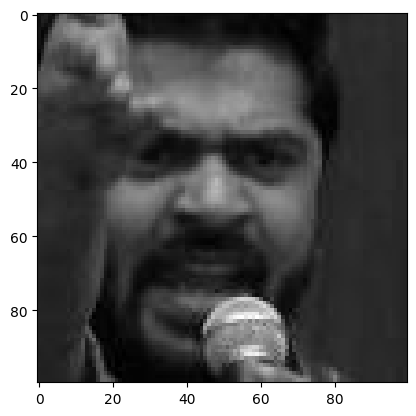

In [15]:
import cv2
import matplotlib.pyplot as plt
img=cv2.imread('data/Expw-F/angry/1angry_actor_104.jpg',cv2.IMREAD_GRAYSCALE)
img=cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
plt.imshow(img)
plt.show()